# AI Inventory Management System Backend Recommandation Using AI & ML

# Step 1: Install required libraries

In [5]:
!pip install pytrends
!pip install requests
!pip install beautifulsoup4
!pip install scikit-learn
!pip install matplotlib

You should consider upgrading via the 'C:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached scikit_learn-1.6.0-cp310-cp310-win_amd64.whl (11.1 MB)


You should consider upgrading via the 'C:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


<Figure size 1000x600 with 0 Axes>

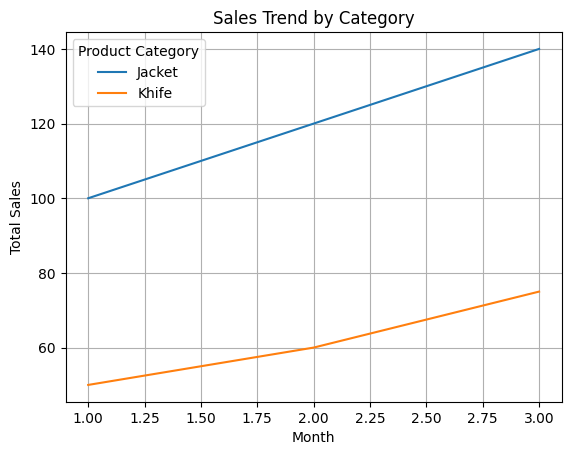

Correlation between Ad Spend and Sales:
           Ad_Spend    Sales
Ad_Spend   1.00000  0.99553
Sales      0.99553  1.00000


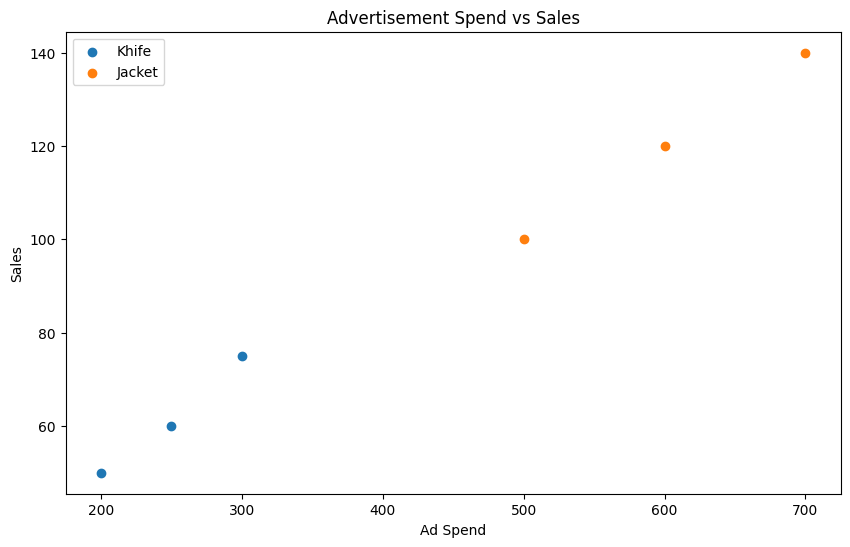


Cosine Similarity Matrix between Products:
 [[1.         0.9999555  1.         0.99886814 0.99886814 0.99886814]
 [0.9999555  1.         0.9999555  0.9992724  0.9992724  0.9992724 ]
 [1.         0.9999555  1.         0.99886814 0.99886814 0.99886814]
 [0.99886814 0.9992724  0.99886814 1.         1.         1.        ]
 [0.99886814 0.9992724  0.99886814 1.         1.         1.        ]
 [0.99886814 0.9992724  0.99886814 1.         1.         1.        ]]

Recommended Month to Advertise Based on Sales Trends:
Category
Jacket    3
Khife     3
dtype: int32
Recommended month to advertise Khife: 3
Recommended month to advertise Jacket: 3

Based on the analysis, here is the strategy for advertisement:

For Khife:
- Average Sales: 61.666666666666664
- Average Advertisement Spend: 250.0
- Best Month to Advertise: 3

For Jacket:
- Average Sales: 120.0
- Average Advertisement Spend: 600.0
- Best Month to Advertise: 3


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Example data: Sales, Advertisement, Product Category
data = {
    'Product': ['Khife', 'Khife', 'Khife', 'Jacket', 'Jacket', 'Jacket'],
    'Date': ['2024-01-15', '2024-02-12', '2024-03-10', '2024-01-20', '2024-02-18', '2024-03-14'],
    'Sales': [50, 60, 75, 100, 120, 140],
    'Ad_Spend': [200, 250, 300, 500, 600, 700],
    'Category': ['Khife', 'Khife', 'Khife', 'Jacket', 'Jacket', 'Jacket'],
    'Region': ['Urban', 'Urban', 'Suburban', 'Urban', 'Suburban', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year from Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Trend Analysis: Sales Trends by Month and Category
plt.figure(figsize=(10, 6))
df.groupby(['Month', 'Category'])['Sales'].sum().unstack().plot(kind='line')
plt.title('Sales Trend by Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Product Category')
plt.show()

# Advertisement Effectiveness: Correlation between Ad Spend and Sales
correlation = df[['Ad_Spend', 'Sales']].corr()
print("Correlation between Ad Spend and Sales:\n", correlation)

# Scatter plot: Advertisement Spend vs Sales for each product category
plt.figure(figsize=(10, 6))
for product in df['Category'].unique():
    product_data = df[df['Category'] == product]
    plt.scatter(product_data['Ad_Spend'], product_data['Sales'], label=product)
plt.title('Advertisement Spend vs Sales')
plt.xlabel('Ad Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Content-Based Filtering: Similarity Based on Advertisement Spend and Sales
features = df[['Ad_Spend', 'Sales']]
cos_sim = cosine_similarity(features)
print("\nCosine Similarity Matrix between Products:\n", cos_sim)

# Trend-Based Recommendation: Best Month to Advertise
monthly_sales = df.groupby(['Month', 'Category'])['Sales'].sum().unstack()
monthly_sales = monthly_sales.fillna(0)
recommended_month = monthly_sales.idxmax(axis=0)
print("\nRecommended Month to Advertise Based on Sales Trends:")
print(recommended_month)

# Identify the Month with Highest Sales for Each Product Category
best_months = monthly_sales.idxmax(axis=0)
for product in df['Category'].unique():
    print(f"Recommended month to advertise {product}: {best_months[product]}")

# Final Summary of Advertisement Strategy
print("\nBased on the analysis, here is the strategy for advertisement:")
for product in df['Category'].unique():
    product_data = df[df['Category'] == product]
    avg_sales = product_data['Sales'].mean()
    avg_ad_spend = product_data['Ad_Spend'].mean()
    best_month = best_months[product]
    print(f"\nFor {product}:")
    print(f"- Average Sales: {avg_sales}")
    print(f"- Average Advertisement Spend: {avg_ad_spend}")
    print(f"- Best Month to Advertise: {best_month}")

In [7]:
df

,Product,Date,Sales,Ad_Spend,Category,Region,Month,Year
0,Khife,2024-01-15,50,200,Khife,Urban,1,2024
1,Khife,2024-02-12,60,250,Khife,Urban,2,2024
2,Khife,2024-03-10,75,300,Khife,Suburban,3,2024
3,Jacket,2024-01-20,100,500,Jacket,Urban,1,2024
4,Jacket,2024-02-18,120,600,Jacket,Suburban,2,2024
5,Jacket,2024-03-14,140,700,Jacket,Urban,3,2024


# Chatbot Using AI & NLP

In [4]:
# Import required libraries
import nltk
from nltk.chat.util import Chat, reflections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
import spacy

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Predefined responses and intents
responses = {
    "greeting": ["Hello! How can I help you?", "Hi there! What can I do for you?", "Hey! How can I assist you?"],
    "goodbye": ["Goodbye! Have a great day!", "Bye! Take care!", "See you later!"],
    "thanks": ["You're welcome!", "No problem!", "Happy to help!"],
    "default": ["I'm sorry, I didn't understand that.", "Can you please rephrase?", "I'm not sure I follow."],
}

# Dataset for training chatbot intents
chat_data = {
    "greeting": ["hi", "hello", "hey", "good morning", "good evening"],
    "goodbye": ["bye", "goodbye", "see you later", "farewell"],
    "thanks": ["thank you", "thanks", "I appreciate it", "thanks a lot"],
}

# Function to preprocess text
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Build training dataset
training_sentences = []
training_labels = []
for intent, sentences in chat_data.items():
    for sentence in sentences:
        training_sentences.append(preprocess(sentence))
        training_labels.append(intent)

# Vectorize the text
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(training_sentences)

# Function to get the chatbot response
def get_response(user_input):
    user_input_preprocessed = preprocess(user_input)
    user_vector = vectorizer.transform([user_input_preprocessed])
    similarity_scores = cosine_similarity(user_vector, X_train)

    # Get the best matching response
    max_score_index = similarity_scores.argmax()
    max_score = similarity_scores[0, max_score_index]

    if max_score > 0.5:  # Threshold for matching
        intent = training_labels[max_score_index]
        return random.choice(responses.get(intent, responses["default"]))
    else:
        return random.choice(responses["default"])

# Chatbot interaction
def chatbot():
    print("Chatbot: Hi! I'm your friendly chatbot. Type 'exit' to end the chat.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chatbot: Goodbye!")
            break
        response = get_response(user_input)
        print(f"Chatbot: {response}")

# Run the chatbot
chatbot()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Chatbot: Hi! I'm your friendly chatbot. Type 'exit' to end the chat.


You:  exit


Chatbot: Goodbye!
